<h1>MSSV: 22521034</h1>
<h1>Họ tên: Huỳnh Yến Nhi</h1>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Câu 1: Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện

In [4]:
df = pd.read_csv("winequality-red.csv")

In [15]:
X= df.drop('quality',axis=1)
y=df['quality']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

 Câu 3: Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson.

<Axes: >

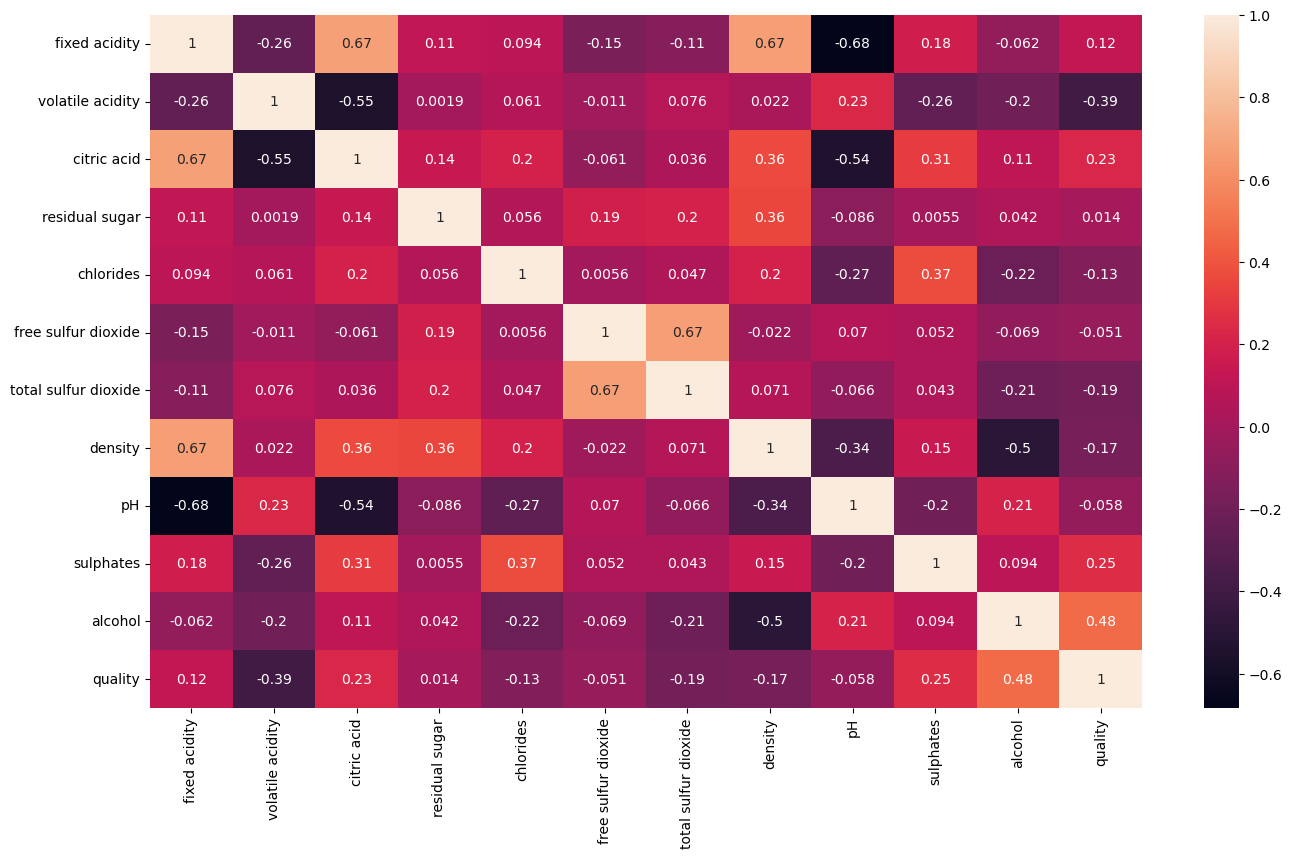

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

Nhận thấy, không có thuộc tính nào tương đồng cao với nhau nên không cần thiết
phải loại bỏ cột nào.

Câu 4: Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
phần chứa riêng thuộc tính quyết định.

In [31]:
features = df.drop('quality',axis=1)
labels = df['quality']

Câu 5: Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu
vào của thư viện.

Câu 6: Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.
Tiến hành tách dữ liệu huấn luyện và kiểm thử như thông tin thu được ban đầu.

Câu 7: Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả
của cây bằng ma trận nhầm lẫn.

In [35]:
clf= tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.5833333333333334
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.12      0.10        17
           5       0.70      0.66      0.68       195
           6       0.60      0.60      0.60       200
           7       0.43      0.46      0.44        61
           8       0.25      0.17      0.20         6

    accuracy                           0.58       480
   macro avg       0.34      0.33      0.34       480
weighted avg       0.59      0.58      0.59       480



In [39]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

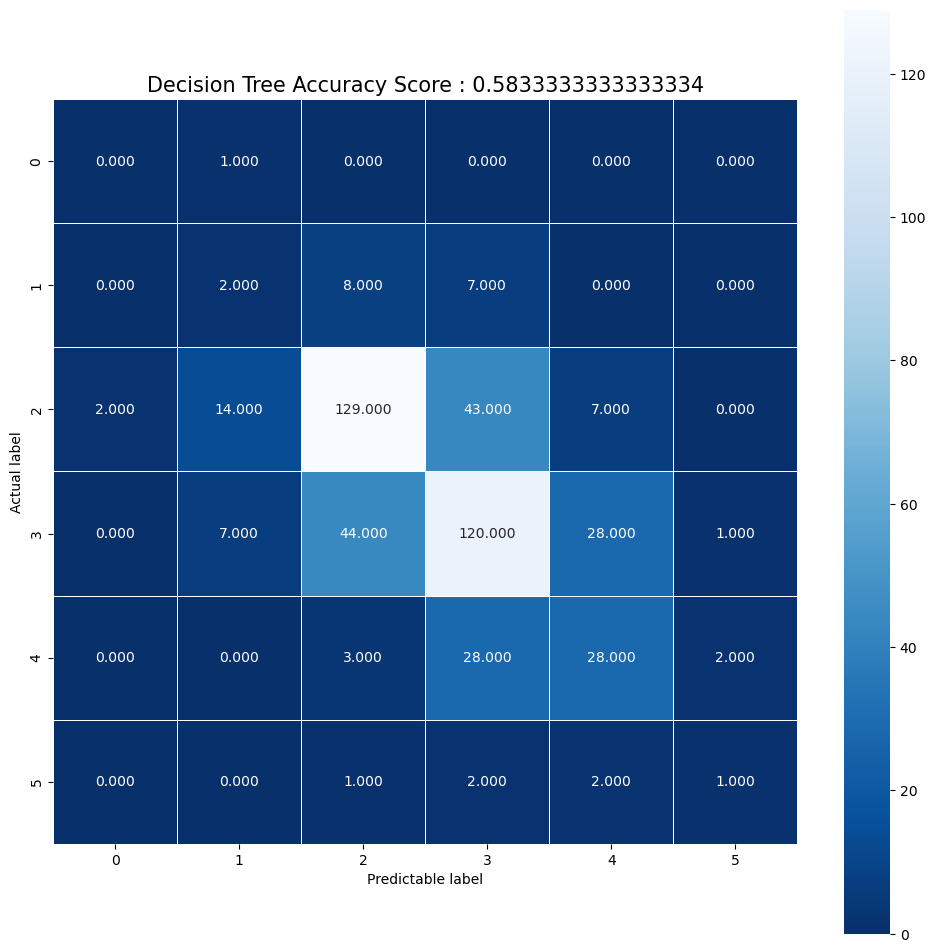

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predictable label');
title = 'Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size=15);
plt.show()

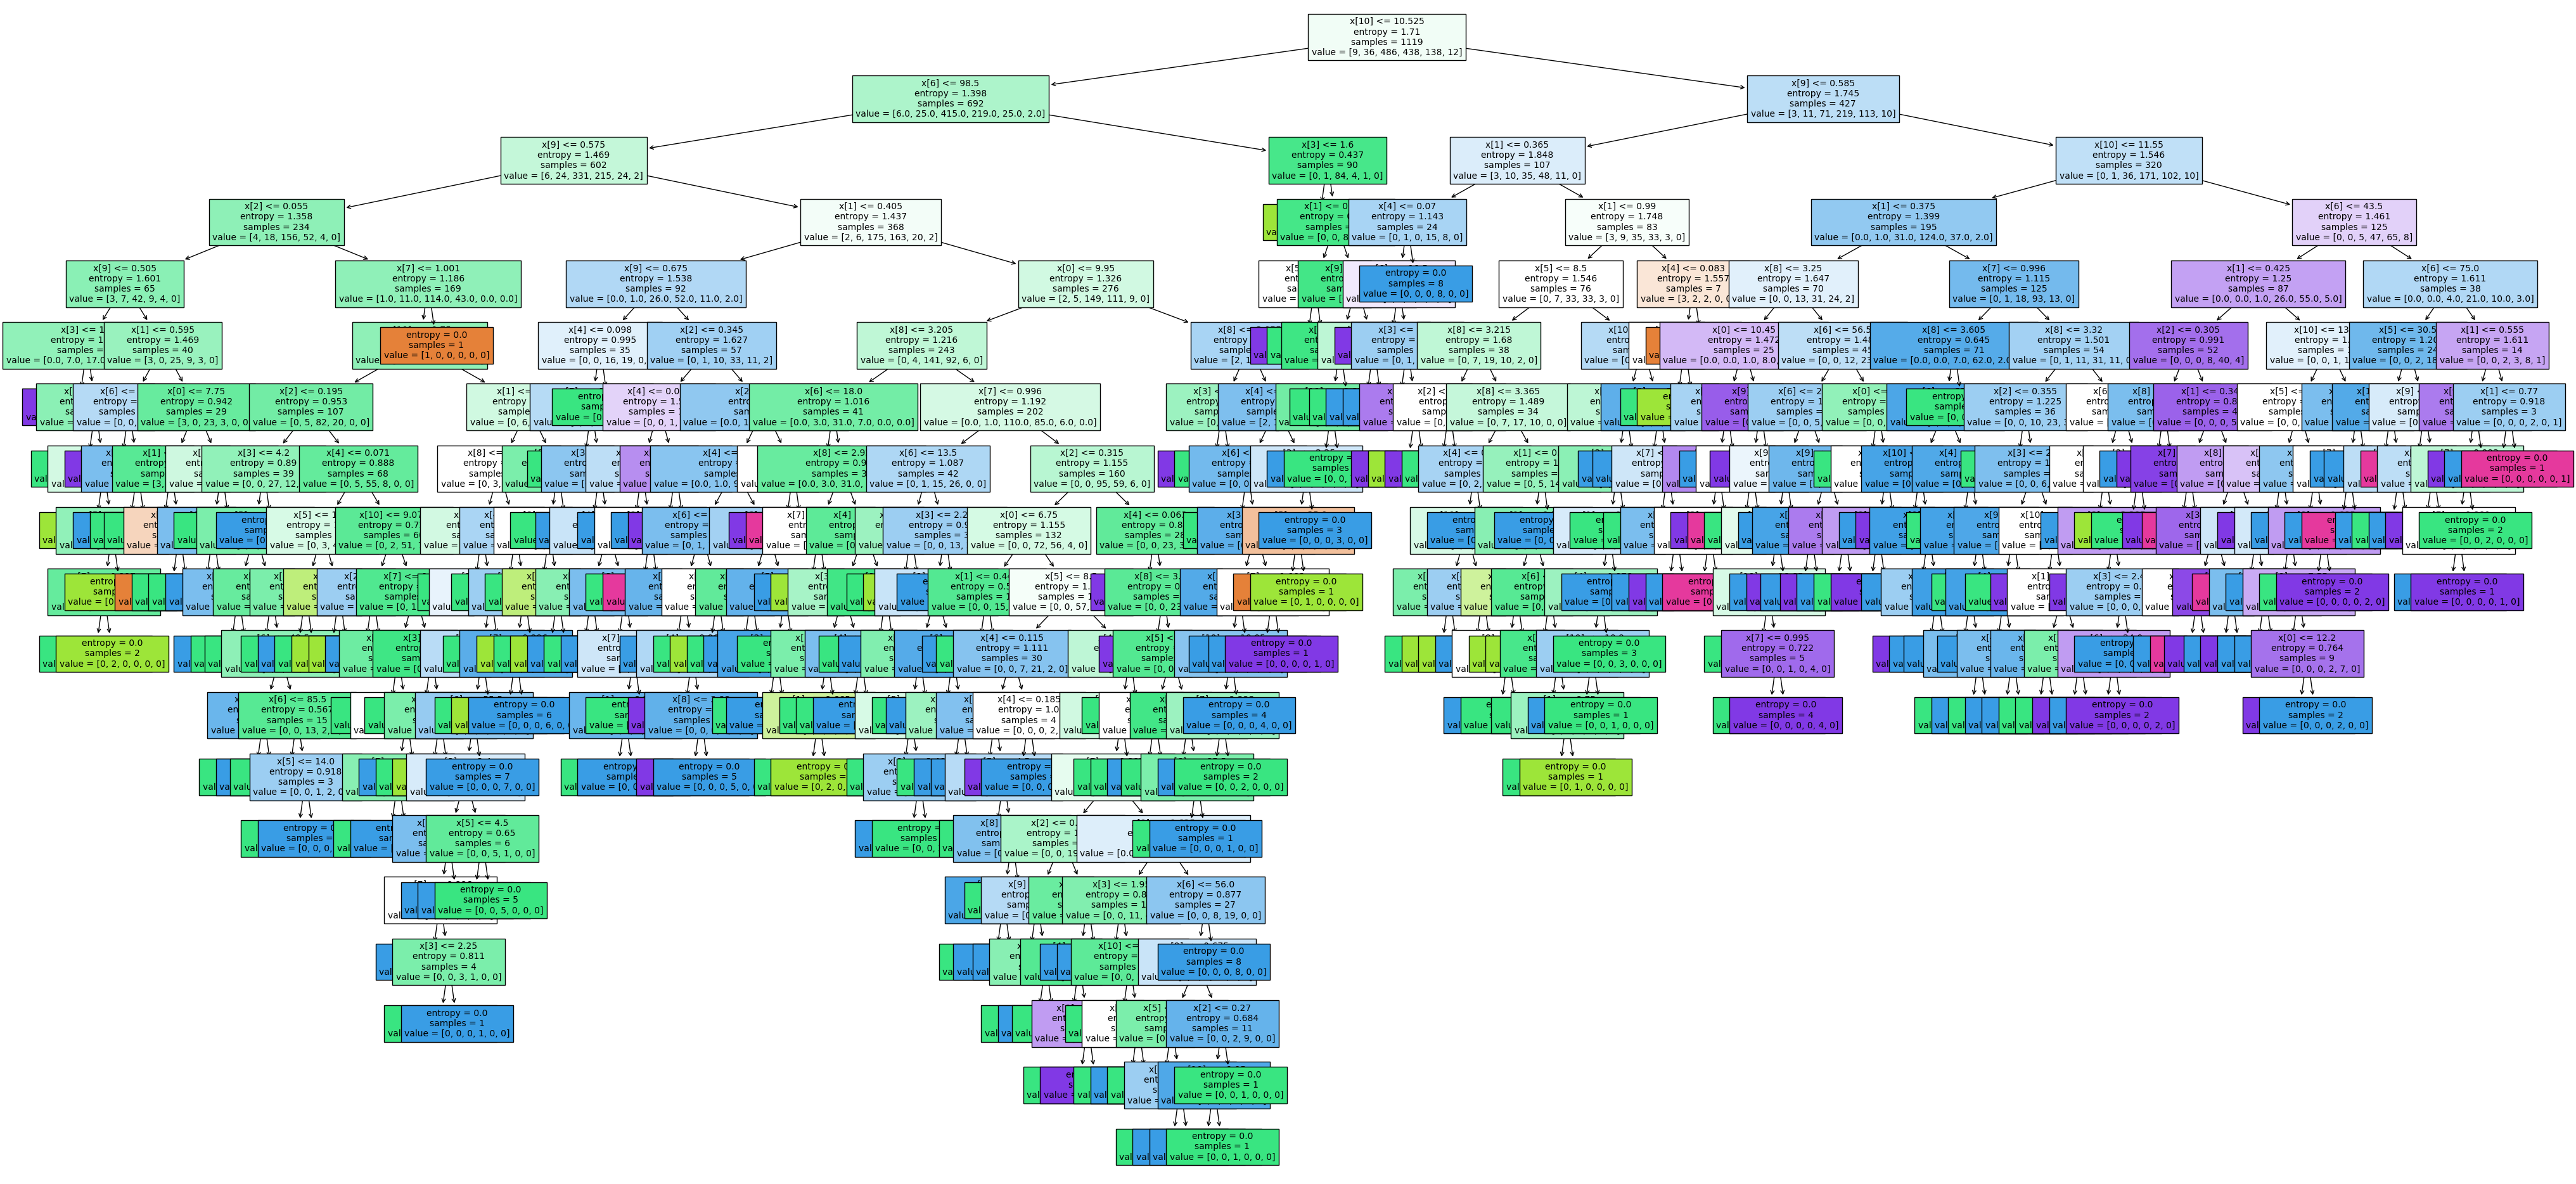

In [43]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

Câu 8

In [44]:
clf= tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [45]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.5625
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.64      0.62      0.63       195
           6       0.57      0.58      0.57       200
           7       0.45      0.49      0.47        61
           8       0.33      0.33      0.33         6

    accuracy                           0.56       480
   macro avg       0.34      0.35      0.35       480
weighted avg       0.56      0.56      0.56       480



In [46]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

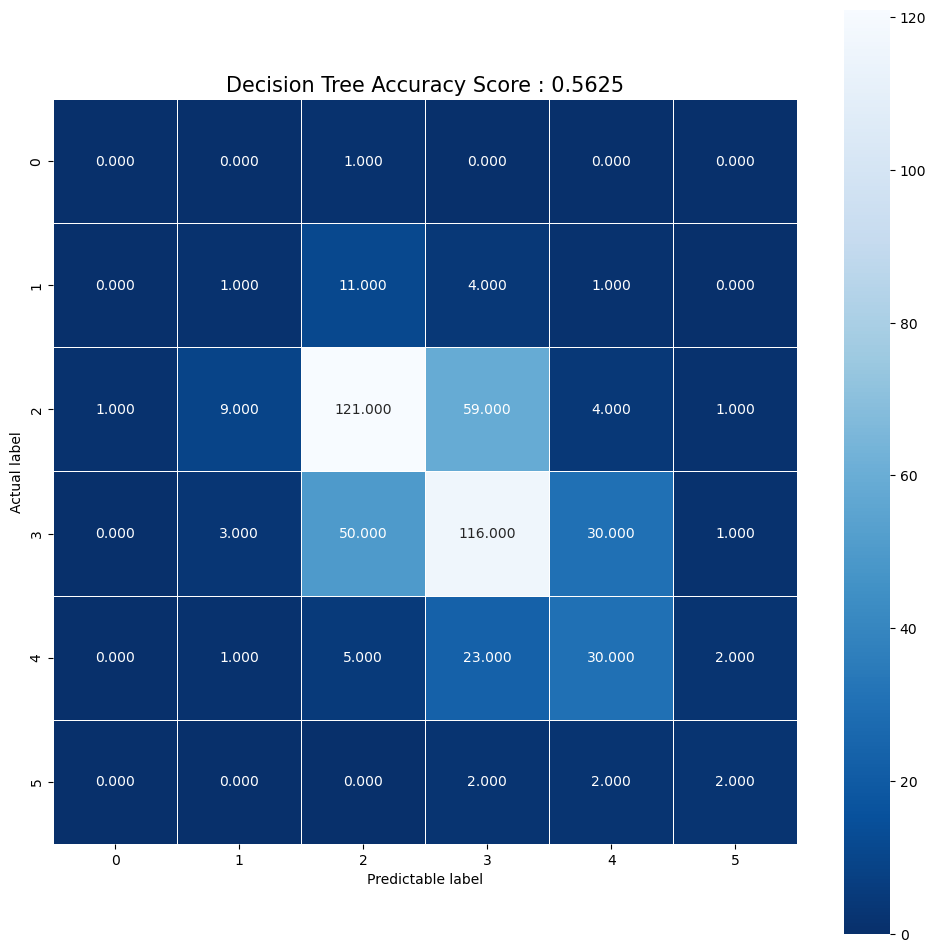

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predictable label');
title = 'Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size=15);
plt.show()

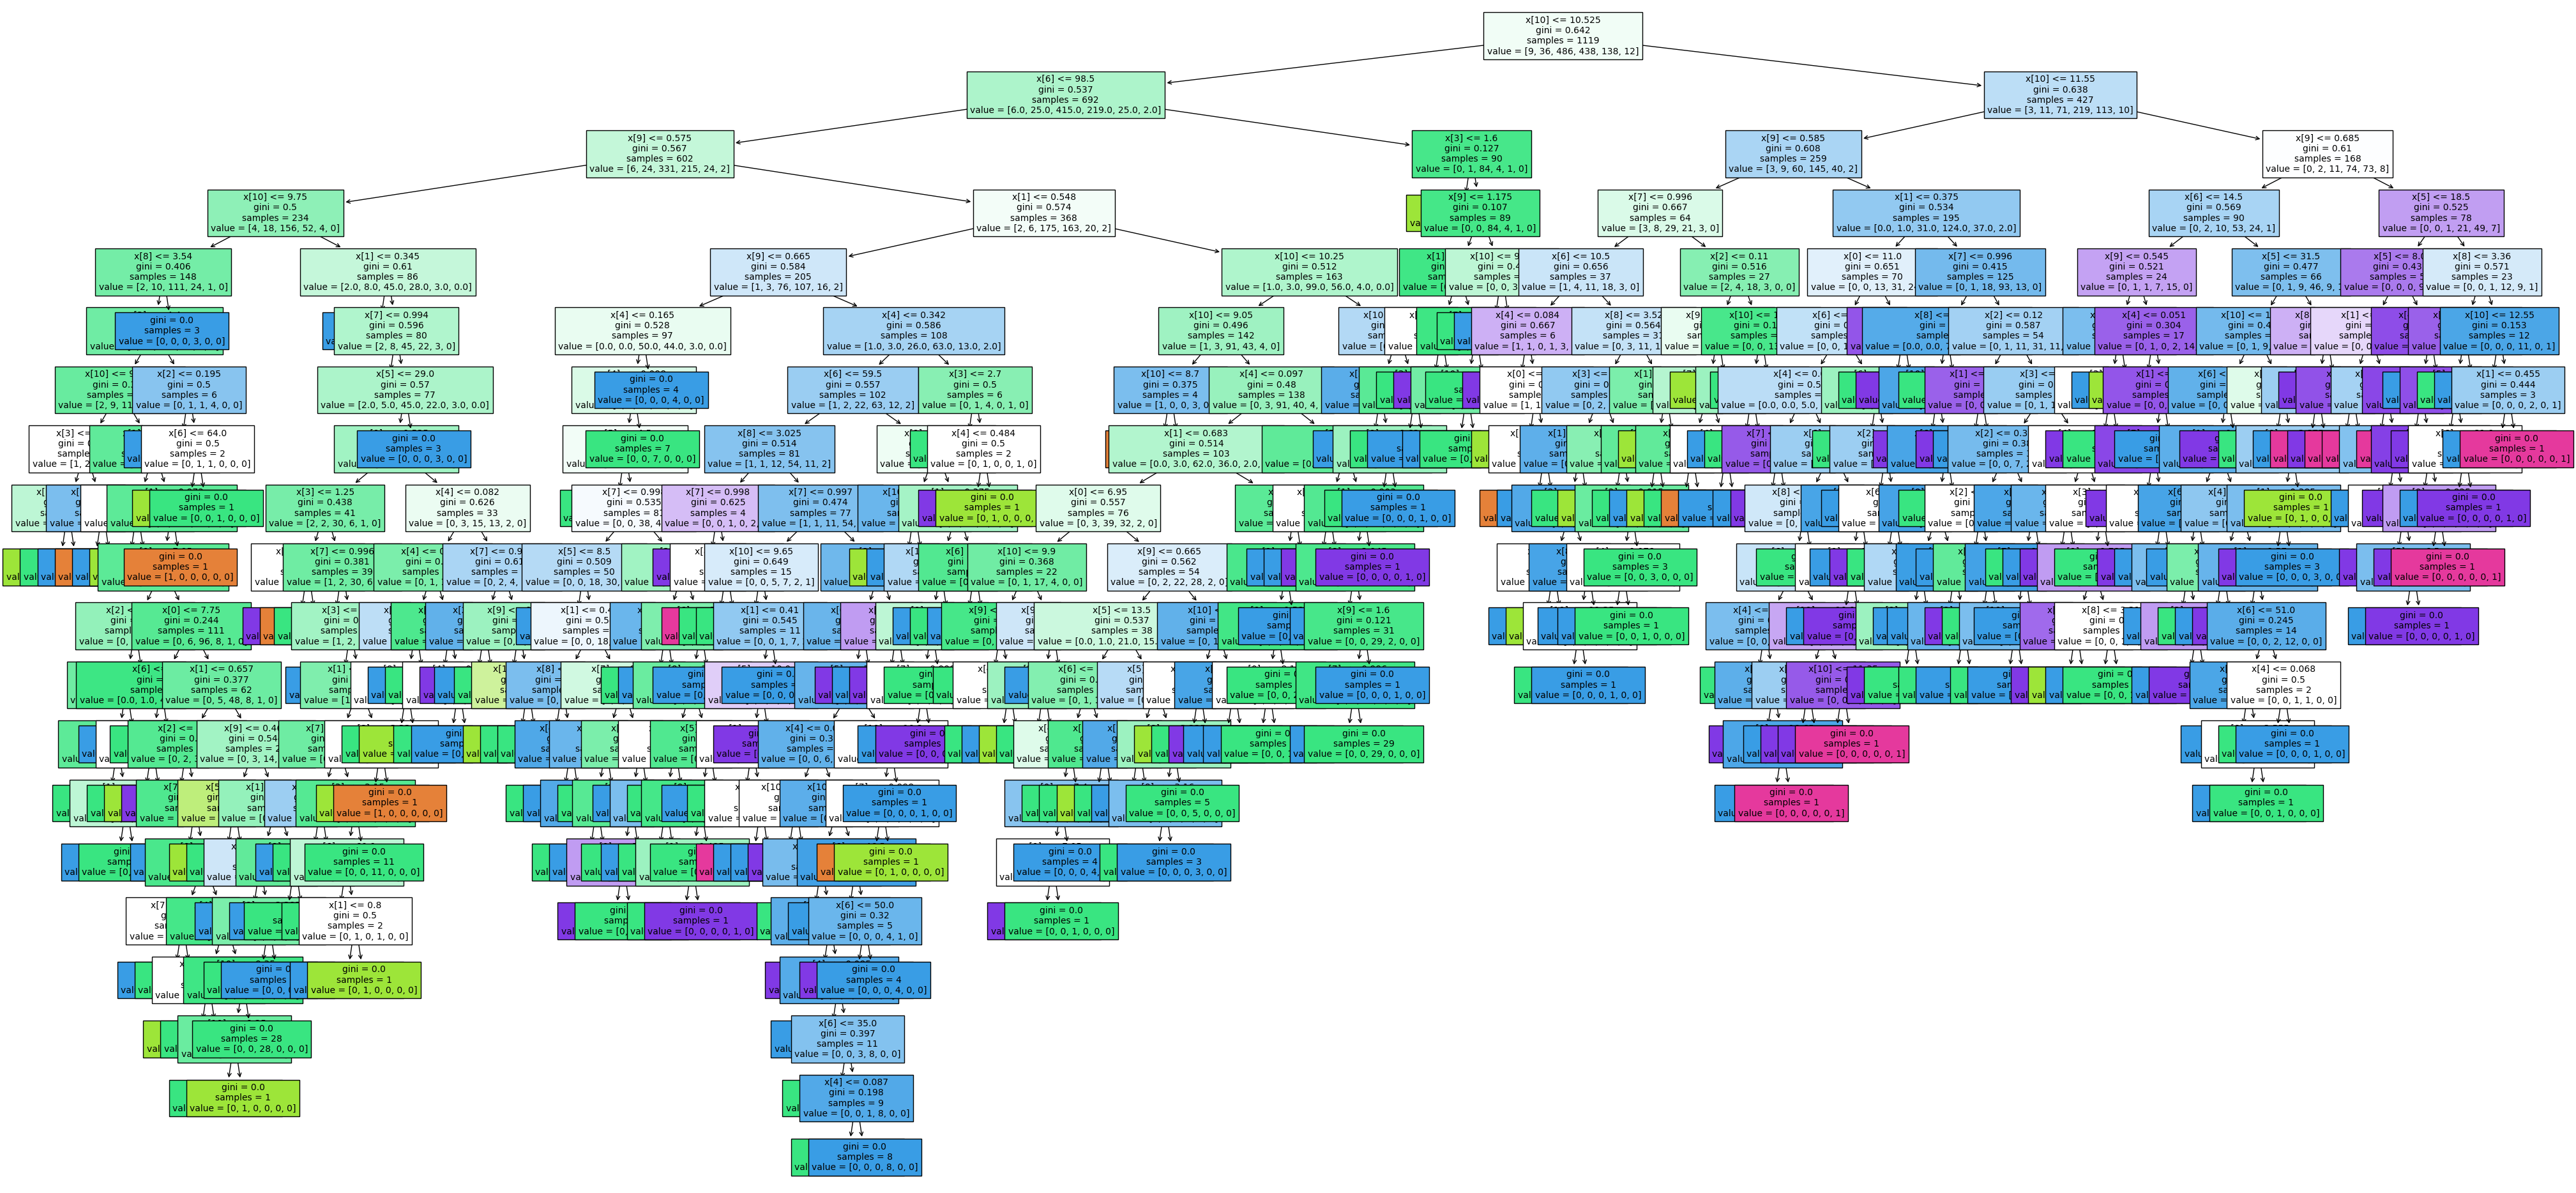

In [51]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

Câu 9: Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt
được.

In [52]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train,y_train).predict(X_test)

In [55]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test,bayes_pred))

Accuracy: 0.5416666666666666
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480



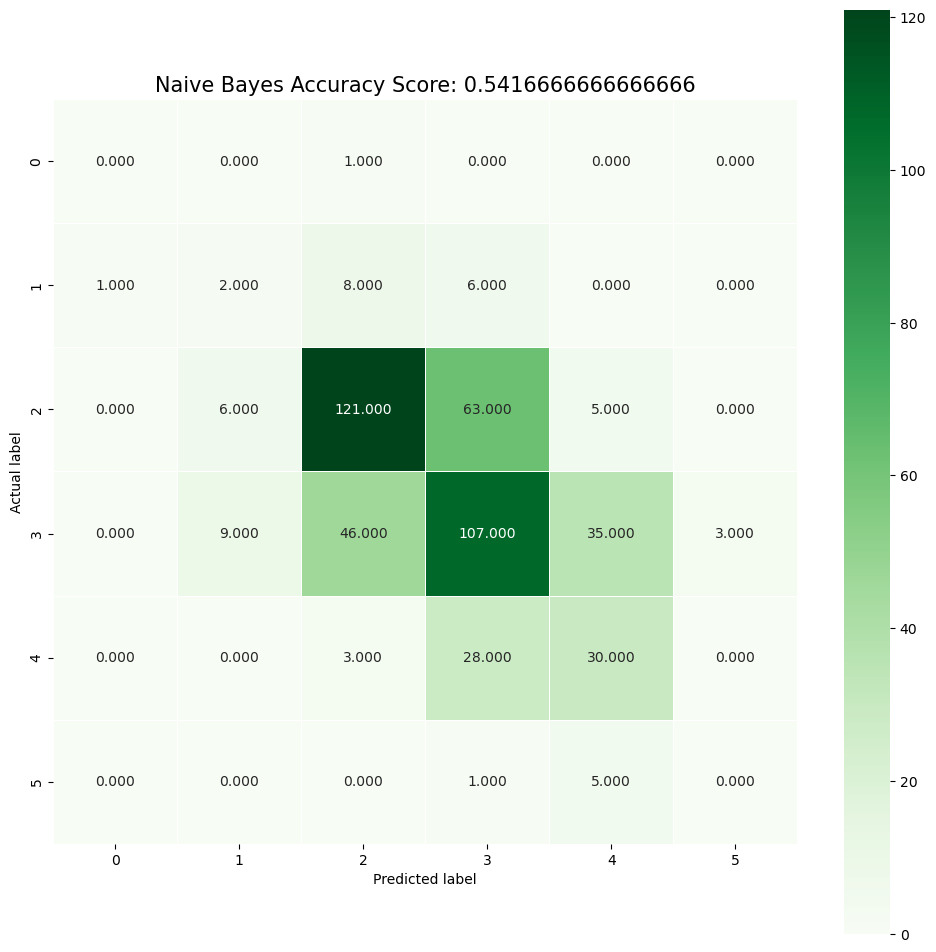

In [57]:
bayes_cm = metrics.confusion_matrix(y_test,bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True,fmt=".3f",linewidths=.5, square=True,cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title,size=15);

Câu 10: So sánh
Dựa vào mô hình ta thấy độ chính xác của các thuật toán như sau:
ID3        :58,33%;
Naive Bayes:56,25%;
CART       :72.527%;
Do đó với việc sử dụng thuật toán Native Bayes cho độ chính xác cao nhất.